Download the leaning tower of the PISA image and find the angle of inclination using
appropriate rotations with bilinear interpolation.

Note: The rotation must be performed using both user defined and predefined functions.

In [1]:
# This Assignment is done by CS20B1044 Avinash R Changrani
# importing required libraries

import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# loading the image
img = cv2.imread('PISA.jpg')

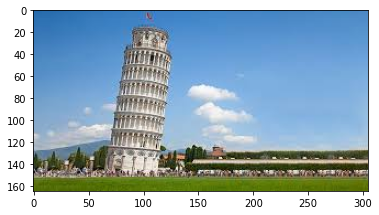

In [3]:
# converting the image to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# displaying the image
plt.imshow(img)

In [4]:
# inbuilt function to rotate the image using cv2 by some angle in degrees
def rotate_image(img, angle):
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
    return rotated


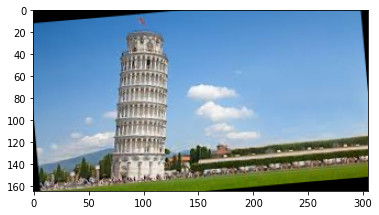

In [5]:
# Example using the inbuilt function 
rotated = rotate_image(img, 5)

# displaying the rotated image
plt.imshow(rotated)

In [6]:
# user defined function to rotate the image by some angle in degrees
def rotate_image_user(image, angle):
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    rads = np.deg2rad(angle)
    sin = np.sin(rads)
    cos = np.cos(rads)

    new_image = np.zeros_like(image)
    for x in range(w):
        for y in range(h):
            (newX, newY) = (int((cos * (x - cX)) - (sin * (y - cY)) + cX),
                            int((sin * (x - cX)) + (cos * (y - cY)) + cY))
            if newX >= 0 and newX < w and newY >= 0 and newY < h:
                new_image[y, x] = image[newY, newX]

    return new_image


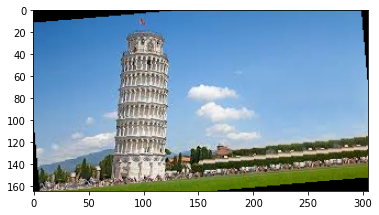

In [7]:
# Example using the userdefined function 
rotated_user = rotate_image_user(img, 5)

# displaying the rotated image
plt.imshow(rotated_user)

In [8]:
# function to calculate the angle of inclination of the tower
def calculate_angle_inclination(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Threshold the image to segment the tower
    _, thresholded = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    #plt.imshow(thresholded, cmap='gray')

    # Find the base pixel and highest pixel of the tower
    for i in range(thresholded.shape[0] - 1, 0, -1):
        row = thresholded[i, :]
        if np.count_nonzero(row) > 0:
            base_y = i
            break
    for i in range(thresholded.shape[0]):
        row = thresholded[i, :]
        if np.count_nonzero(row) > 0:
            top_y = i
            break
    # Find the x coordinates of the base and top pixels
    base_x = np.argmax(thresholded[base_y, :])
    top_x = np.argmax(thresholded[top_y, :])

    # Compute the line equation y = mx + b
    m = (base_y - top_y) / (base_x - top_x)
    b = base_y - m * base_x

    # Find the angle of inclination of the tower (angle = tan^-1(m)
    angle = math.atan(m)

    # Convert the angle to degrees with the vertical
    angle = 90 - math.degrees(angle)

    #print("Angle of inclination: {:.2f} degrees".format(angle))
    return angle

Angle of inclination of tower of pisa:  10.027908767424805 degrees


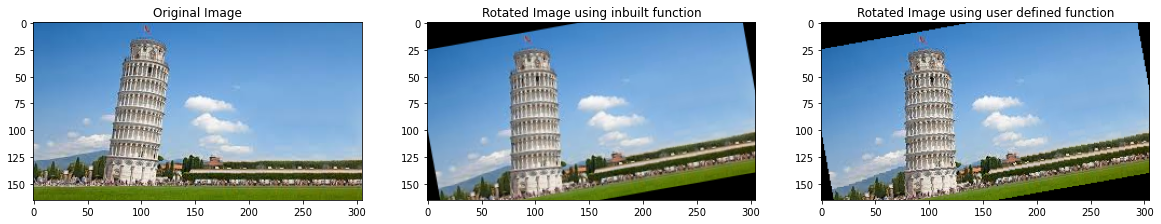

In [9]:
# calculate the angle of inclination of tower of pisa 
angle = calculate_angle_inclination(img)

# displaying the angle of inclination of tower of pisa 
print("Angle of inclination of tower of pisa: ", angle, "degrees")

# rotate the image by the angle using inbuilt and userdefined function
rotated = rotate_image(img, angle)
rotated_user = rotate_image_user(img, angle)

# display the differences by displaying all the three images
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(1, 3, 2)
plt.imshow(rotated)
plt.title("Rotated Image using inbuilt function")
plt.subplot(1, 3, 3)
plt.imshow(rotated_user)
plt.title("Rotated Image using user defined function")
plt.show()